Importing Libraries

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Loading the Data

In [85]:
df = pd.read_csv(r"C:\Users\shahd\OneDrive\Desktop\Git\PRODIGY_ML_02\Mall_Customers.csv")

EDA

In [86]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
df.isna().sum()    #no missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [88]:
df.duplicated().sum()   #no duplicated rows

np.int64(0)

In [89]:
df.shape    #200 row and 5 coulmns

(200, 5)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [91]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Preprocessing

In [92]:
lr = LabelEncoder()
df["Gender"] = lr.fit_transform(df["Gender"])

In [93]:
df.drop("CustomerID" , axis = 1 , inplace = True)

In [94]:
df.head(7)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6


Scaling the Data

In [95]:
scaler = StandardScaler()
df[["Gender_T" , "Age_T" ,	"Annual Income (k$)_T" , "Spending Score (1-100)_T"]] = scaler.fit_transform(df[["Gender" 
                                                                                                            , "Age" ,	"Annual Income (k$)" , "Spending Score (1-100)"]])

In [96]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_T,Age_T,Annual Income (k$)_T,Spending Score (1-100)_T
0,1,19,15,39,1.128152,-1.424569,-1.738999,-0.434801
1,1,21,15,81,1.128152,-1.281035,-1.738999,1.195704
2,0,20,16,6,-0.886405,-1.352802,-1.700830,-1.715913
3,0,23,16,77,-0.886405,-1.137502,-1.700830,1.040418
4,0,31,17,40,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...,...,...,...
195,0,35,120,79,-0.886405,-0.276302,2.268791,1.118061
196,0,45,126,28,-0.886405,0.441365,2.497807,-0.861839
197,1,32,126,74,1.128152,-0.491602,2.497807,0.923953
198,1,32,137,18,1.128152,-0.491602,2.917671,-1.250054


In [97]:
scaled_df = df.drop(columns = ["Gender" , "Age" , "Annual Income (k$)" , "Spending Score (1-100)"] )

In [98]:
scaled_df.head(7)

,Gender_T,Age_T,Annual Income (k$)_T,Spending Score (1-100)_T
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
5,-0.886405,-1.209269,-1.662660,1.001596
6,-0.886405,-0.276302,-1.624491,-1.715913


Identifying the Optimum Number of Clusters (elbow plot)

In [99]:
def optimise_kmeans(data , max_k):
    clusters = []
    inertias = []

    for k in range (1 , max_k):
        kmeans = KMeans(n_clusters= k)
        kmeans.fit(data)

        clusters.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize = (10,5))
    plt.plot(clusters , inertias , "o-")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertias")
    plt.grid = True
    plt.show()

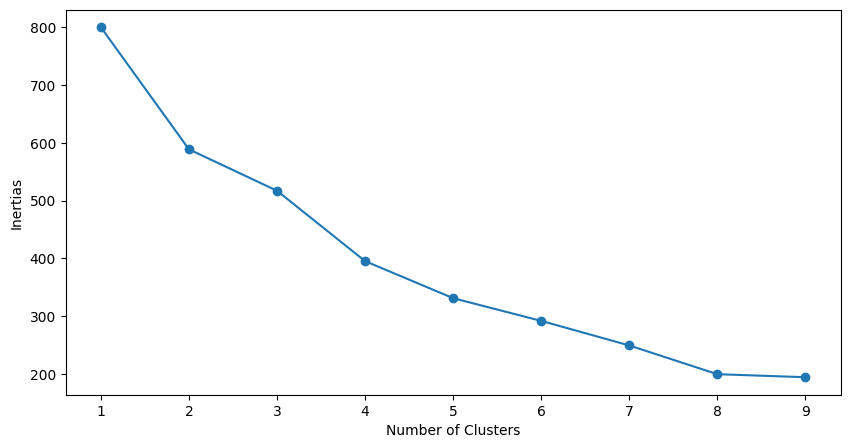

In [100]:
optimise_kmeans(scaled_df , 10)

Applying K-Means Clustering

In [101]:
model = KMeans(n_clusters= 4 , random_state=42)

In [102]:
model.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [103]:
scaled_df["clusters"] = model.labels_
scaled_df.head(10)

,Gender_T,Age_T,Annual Income (k$)_T,Spending Score (1-100)_T,clusters
0,1.128152,-1.424569,-1.738999,-0.434801,2
1,1.128152,-1.281035,-1.738999,1.195704,2
2,-0.886405,-1.352802,-1.700830,-1.715913,3
3,-0.886405,-1.137502,-1.700830,1.040418,3
4,-0.886405,-0.563369,-1.662660,-0.395980,3
5,-0.886405,-1.209269,-1.662660,1.001596,3
6,-0.886405,-0.276302,-1.624491,-1.715913,0
7,-0.886405,-1.137502,-1.624491,1.700384,3
8,1.128152,1.804932,-1.586321,-1.832378,0
9,-0.886405,-0.635135,-1.586321,0.846310,3


Visualizing the Results using Pair Plot

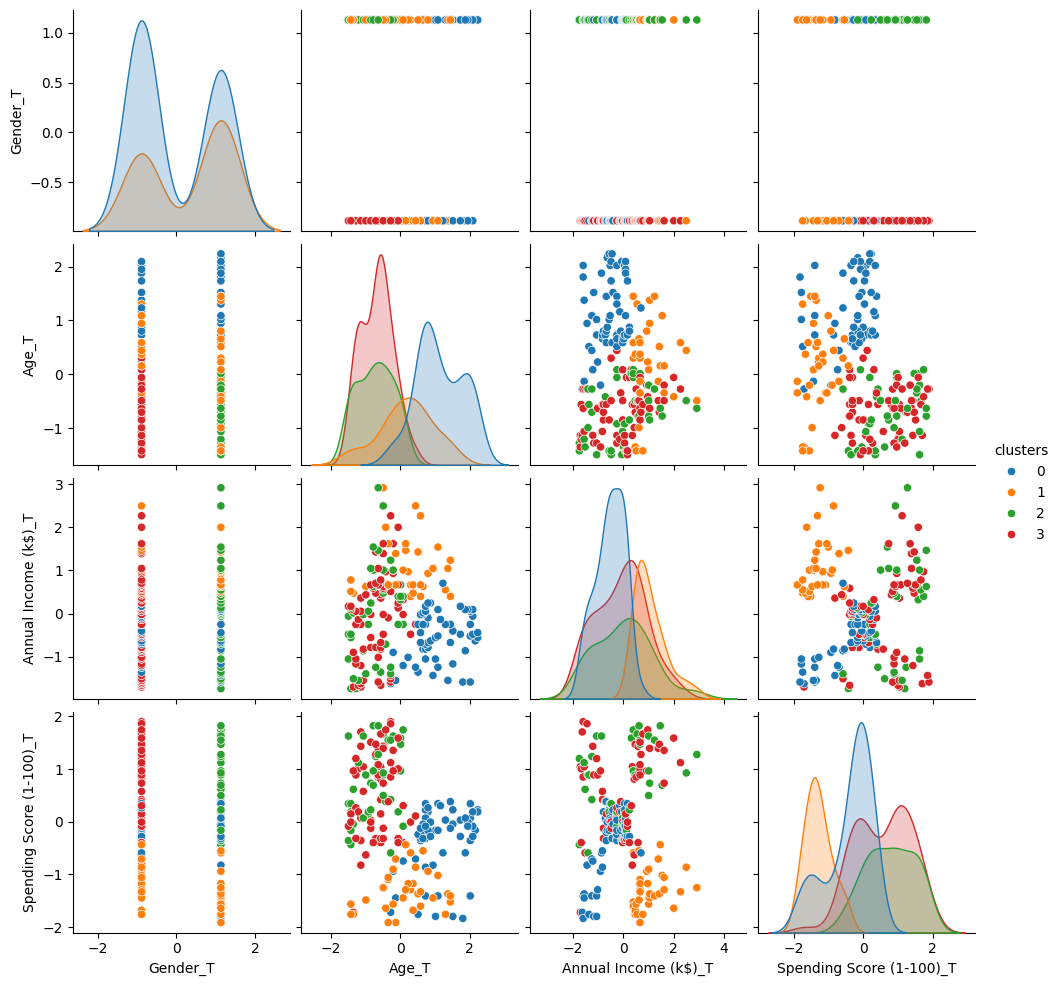

In [104]:
sns.pairplot(scaled_df, hue='clusters', palette='tab10' )
plt.show()

Visualizing the Results using PCA (Principle Component Analysis)

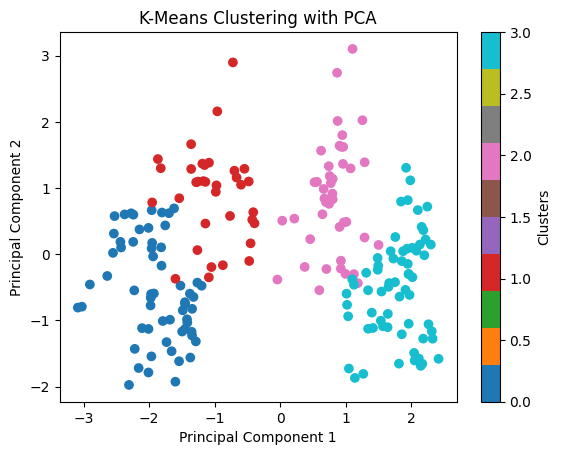

In [106]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c= scaled_df["clusters"] , cmap='tab10')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering with PCA")
plt.colorbar(label="Clusters")
plt.show()